# Visualisation data for drummer one: phrases 36 - 89

In [1]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt
import IPython.display
import essentia
import essentia.standard as es
import librosa
import librosa.display
import pandas as pd
from collections import Counter
import os
import pandas as pd
from utils import *

In [2]:
# for f in *.csv; do cut -d' ' -f2 --complement $f > onset.$f; done
# cut out annotations and reduce csv-file to one row

In [3]:
beat_outliers = []
beats = []
devs = []

Create a metrical grid (with Essentia beat estimation and linspace; compare humanly annotated onsets against this grid.

Problem: note all the songs have beats %4, so either the audio-files have to be cleaned, or the songs use a different time signature than 4/4. 

In [4]:
for file in os.listdir('sounds/'):

    beats=[]
    idealSixteenths = []
    init_beat = []
    end_beat = []
    
    if '.wav' not in file: continue
    filename = file
    load_file = 'sounds/' + filename  
    
    # load audio 
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    # find beats
    bt = es.BeatTrackerMultiFeature()
    beats, _ = bt(audio)

    # check if beats are %4
    if len(beats)%4 == 0:
        print 'The song is probably in 4/4'
    else:
        beat_outliers.append(file)
    # save graph to specific folder

    # create metrical grid:
    a = len(beats) - 1
    init_beat = beats[0]
    end_beat = beats[a]

    # equally spaced lines
    ids_range = len(beats)*4
    idealSixteenths = np.linspace(init_beat, end_beat, ids_range)

    #file = filename
    #filejpg = 'plots/'+'plot.' + file[:-3] + 'png'

    #fs=44100
    #t = np.arange(len(audio))/float(fs)
    #plt.plot(t, audio)
    #for loc in idealSixteenths:
    #    plt.axvline(x=loc, color='y')
    #for i in range(len(beats)):
    #    plt.axvline(idealSixteenths[4*i], color = 'r')

    #title = file[:-4] 
    #plt.title(title)
    #plt.xlabel('time')
    #plt.ylabel('audio')
    #plt.savefig(filejpg)
    #plt.close()

    # save metrical grid to file
    # should be used for later analysis of the instruments

    filetxt = 'metrical_grid/'+'metgrid.' + file[:-3] + 'txt' #or csv?
    np.savetxt(filetxt, idealSixteenths)

    # read annotated onsets from csv-file
    read_onset = 'onsets/' + 'onset.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)

    # find nearest neighbour

    for onset in onsets:
        devs.append(nearestNeighbour(onset, idealSixteenths))

    # print devs
    
    # see amount of onsets per ideal sixteenths:
    # Counter(elem[0] for elem in devs)

The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4


In [5]:
# check 'beat outliers':
# beat_outliers
devs

[(2.0, 0.032),
 (2.0, 0.033),
 (6.0, 0.012),
 (6.0, 0.013),
 (9.0, -0.024),
 (10.0, -0.004),
 (10.0, 0.002),
 (13.0, -0.035),
 (13.0, -0.003),
 (14.0, 0.0),
 (14.0, 0.016),
 (1.0, -0.032),
 (1.0, 0.016),
 (2.0, -0.006),
 (2.0, 0.034),
 (5.0, -0.031),
 (5.0, -0.027),
 (6.0, 0.018),
 (6.0, 0.031),
 (9.0, -0.017),
 (9.0, 0.004),
 (10.0, 0.005),
 (11.0, -0.035),
 (13.0, -0.026),
 (13.0, -0.023),
 (14.0, 0.025),
 (14.0, 0.031),
 (16.0, 0.04),
 (1.0, -0.022),
 (2.0, 0.017),
 (5.0, -0.032),
 (5.0, -0.018),
 (6.0, 0.011),
 (7.0, -0.039),
 (7.0, -0.038),
 (9.0, 0.01),
 (10.0, -0.018),
 (10.0, 0.038),
 (11.0, 0.025),
 (13.0, 0.023),
 (13.0, 0.024),
 (15.0, -0.01),
 (15.0, -0.008),
 (1.0, 0.028),
 (2.0, -0.023),
 (3.0, -0.024),
 (3.0, -0.018),
 (5.0, 0.026),
 (5.0, 0.039),
 (7.0, -0.004),
 (7.0, -0.002),
 (10.0, -0.035),
 (10.0, -0.03),
 (11.0, -0.008),
 (14.0, -0.034),
 (14.0, -0.031),
 (15.0, 0.014),
 (15.0, 0.015),
 (2.0, -0.034),
 (2.0, -0.034),
 (3.0, 0.019),
 (5.0, -0.04),
 (6.0, -0.017),
 

In [17]:
ids_one = [item for item in devs if item[0] == 1]
ids_two = [item for item in devs if item[0] == 2]
ids_three = [item for item in devs if item[0] == 3]
ids_four = [item for item in devs if item[0] == 4]
ids_five = [item for item in devs if item[0] == 5]
ids_six = [item for item in devs if item[0] == 6]
ids_seven = [item for item in devs if item[0] == 7]
ids_eight = [item for item in devs if item[0] == 8]
ids_nine = [item for item in devs if item[0] == 9]
ids_ten = [item for item in devs if item[0] == 10]
ids_eleven = [item for item in devs if item[0] == 11]
ids_twelve = [item for item in devs if item[0] == 12]
ids_thirteen = [item for item in devs if item[0] == 13]
ids_fourteen = [item for item in devs if item[0] == 14]
ids_fifteen = [item for item in devs if item[0] == 15]
ids_sixteen = [item for item in devs if item[0] == 16]

c_one = Counter(elem[1] for elem in ids_one)
c_two = Counter(elem[1] for elem in ids_two)
c_three = Counter(elem[1] for elem in ids_three)
c_four = Counter(elem[1] for elem in ids_four)
c_five = Counter(elem[1] for elem in ids_five)
c_six = Counter(elem[1] for elem in ids_six)
c_seven = Counter(elem[1] for elem in ids_seven)
c_eight = Counter(elem[1] for elem in ids_eight)
c_nine = Counter(elem[1] for elem in ids_nine)
c_ten = Counter(elem[1] for elem in ids_ten)
c_eleven = Counter(elem[1] for elem in ids_eleven)
c_twelve = Counter(elem[1] for elem in ids_twelve)
c_thirteen = Counter(elem[1] for elem in ids_thirteen)
c_fourteen = Counter(elem[1] for elem in ids_fourteen)
c_fifteen = Counter(elem[1] for elem in ids_fifteen)
c_sixteen = Counter(elem[1] for elem in ids_sixteen)

Here I plotted my results with a bar diagram, both in Pandas.DataFrame and matplotlib....the problem however was that the x-axis displays discrete and not continuous values.

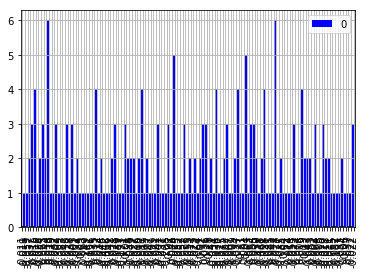

In [9]:
df = pd.DataFrame.from_dict(c_one, orient = 'index')
df.plot(kind = 'bar')

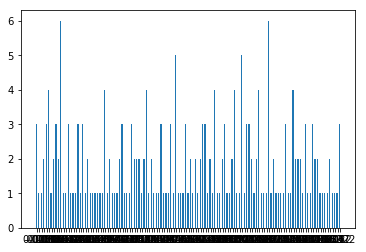

In [60]:
labels, values = zip(*c_one.items())
indexes = np.arange(len(labels))

width = 0.5
fig = plt.bar(indexes,values, width)
plt.xticks(indexes + width *0.5, labels)

plt.show()

So I went back to pyplot's histogram function, where the art seems to lie in choosing the right bin size. To compare, the first ideal sixteenth with different bin sizes: 

(array([  2.,   0.,   5.,   3.,   3.,   2.,   3.,  37.,  44.,  26.]),
 array([-0.442 , -0.3893, -0.3366, -0.2839, -0.2312, -0.1785, -0.1258,
        -0.0731, -0.0204,  0.0323,  0.085 ]),
 <a list of 10 Patch objects>)

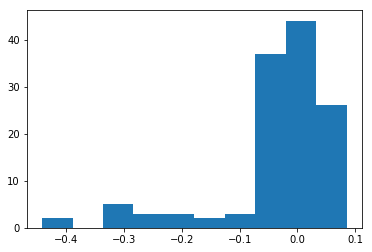

In [61]:
plt.hist(c_one.keys(), 10)

(array([  2.,   0.,   0.,   0.,   3.,   2.,   1.,   2.,   2.,   1.,   2.,
          0.,   0.,   3.,  14.,  23.,  20.,  24.,  18.,   8.]),
 array([-0.442  , -0.41565, -0.3893 , -0.36295, -0.3366 , -0.31025,
        -0.2839 , -0.25755, -0.2312 , -0.20485, -0.1785 , -0.15215,
        -0.1258 , -0.09945, -0.0731 , -0.04675, -0.0204 ,  0.00595,
         0.0323 ,  0.05865,  0.085  ]),
 <a list of 20 Patch objects>)

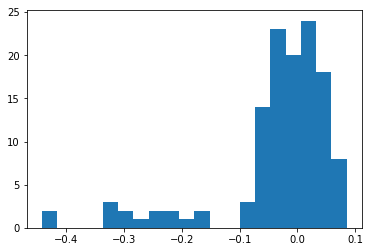

In [62]:
plt.hist(c_one.keys(), 20)

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   2.,   1.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,
          2.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   2.,   5.,   7.,   5.,  11.,   9.,   9.,   6.,  10.,   9.,
         10.,   8.,   8.,   5.,   3.,   2.]),
 array([-0.442  , -0.43146, -0.42092, -0.41038, -0.39984, -0.3893 ,
        -0.37876, -0.36822, -0.35768, -0.34714, -0.3366 , -0.32606,
        -0.31552, -0.30498, -0.29444, -0.2839 , -0.27336, -0.26282,
        -0.25228, -0.24174, -0.2312 , -0.22066, -0.21012, -0.19958,
        -0.18904, -0.1785 , -0.16796, -0.15742, -0.14688, -0.13634,
        -0.1258 , -0.11526, -0.10472, -0.09418, -0.08364, -0.0731 ,
        -0.06256, -0.05202, -0.04148, -0.03094, -0.0204 , -0.00986,
         0.00068,  0.01122,  0.02176,  0.0323 ,  0.04284,  0.05338,
         0.06392,  0.07446,  0.085  ]),
 <a list of 50 Patch objects>)

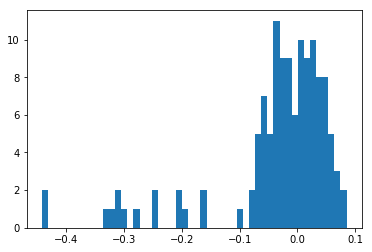

In [63]:
plt.hist(c_one.keys(), 50)

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
         3.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  3.,  2.,  3.,  3.,
         1.,  3.,  2.,  3.,  3.,  2.,  1.,  3.,  2.,  1.,  2.,  1.,  3.,
         2.,  3.,  2.,  1.,  3.,  3.,  2.,  3.,  2.

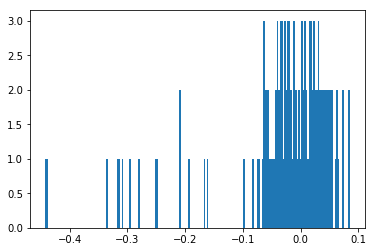

In [64]:
plt.hist(c_one.keys(), 200)

All histograms of the first bar in one graph. 

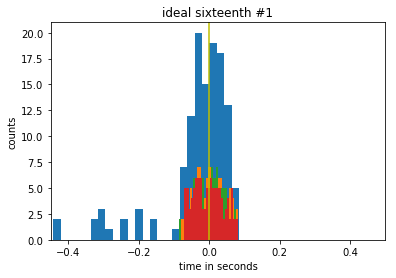

In [65]:
plt.axvline(x=0, color='y')
plt.xlim(-0.45, 0.5)
plt.xlabel('time in seconds')
plt.ylabel('counts')
plt.title('ideal sixteenth #1')
plt.hist(c_one.keys(), 25);
plt.hist(c_two.keys(), 25);
plt.hist(c_three.keys(), 25);
plt.hist(c_four.keys(), 25);

4x4 histogram: with outliers

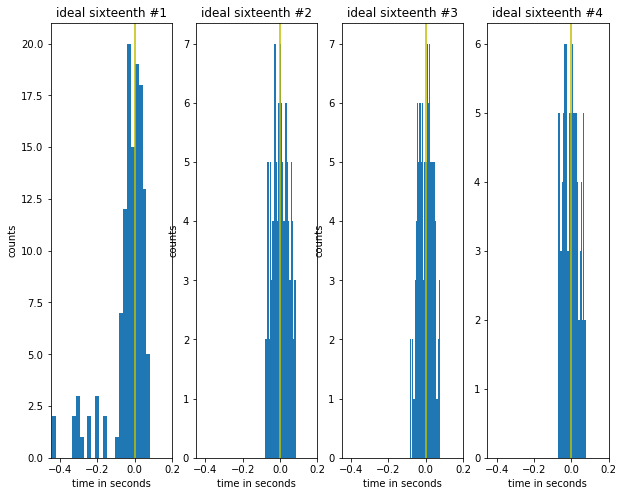

In [66]:
plot_histo_outlier(c_one.keys(), c_two.keys(), c_three.keys(), c_four.keys())

4x4 histogram: without outliers

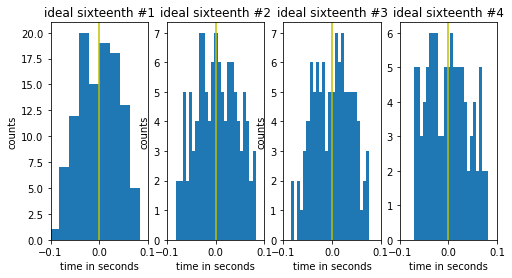

In [67]:
plot_histogramm1(c_one.keys(), c_two.keys(), c_three.keys(), c_four.keys())

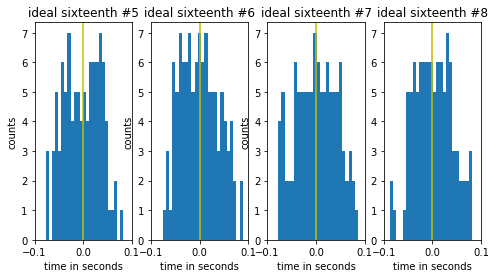

In [68]:
plot_histogramm2(c_five.keys(), c_six.keys(), c_seven.keys(), c_eight.keys())

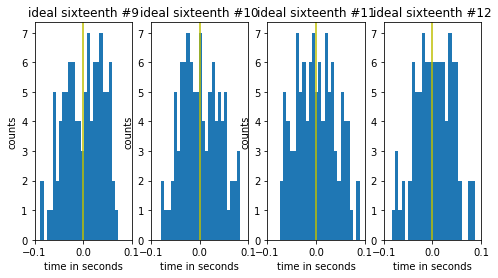

In [69]:
plot_histogramm3(c_nine.keys(), c_ten.keys(), c_eleven.keys(), c_twelve.keys())

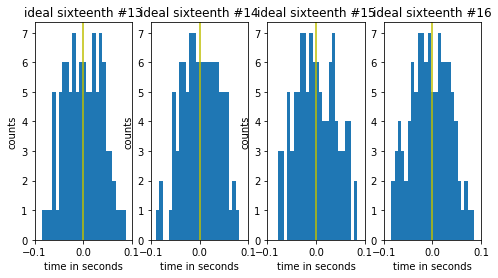

In [70]:
plot_histogramm4(c_thirteen.keys(), c_fourteen.keys(), c_fifteen.keys(), c_sixteen.keys())

Changes:
- outliers for beat 1 (fills) need to be edited out

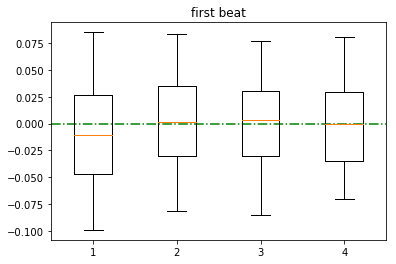

In [71]:
plot_boxplot1(c_one.keys(), c_two.keys(), c_three.keys(), c_four.keys())  

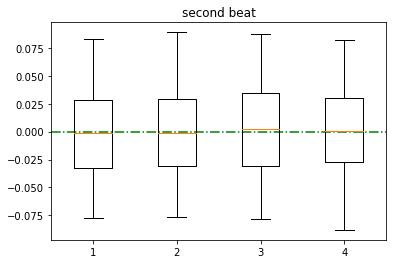

In [72]:
plot_boxplot2(c_five.keys(), c_six.keys(),c_seven.keys(), c_eight.keys())

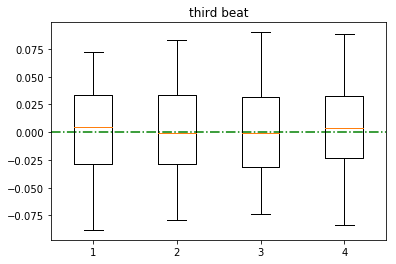

In [73]:
plot_boxplot3(c_nine.keys(), c_ten.keys(),c_eleven.keys(), c_twelve.keys())

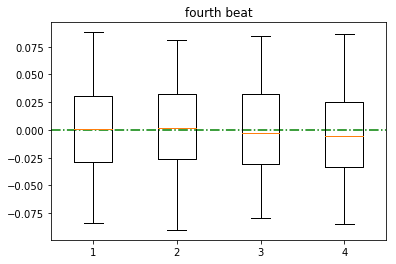

In [74]:
plot_boxplot4(c_thirteen.keys(), c_fourteen.keys(),c_fifteen.keys(), c_sixteen.keys())

The ENST-drums onsets were manually annotated and labelled, depending on the instrument of the drum kit. I stick with the grouping the authors described in the paper about ENST-drums:

#1: bass drum (bd)
#2: brush sweep(sweep), sticks hit together (sticks), snare drum (sd), rim shot (rs), cross stick (cs)
#3: hi-hat (closed) (chh), hi-hat (open) (ohh), cowbell (cb), other cymbals (c)
#4: low-mid tom (lmt)
#5: mid tom (mt), mid tom hit on the rim (mtr), low tom (lt), low tom hit on the rim (ltr), lowest tom (lft)
#6: ride cymbal (rc), chinese ride cymbal (ch), crash cymbal (cr), splash cymbal (spl)

In [75]:
# shell-scripting to separate data:
# for f in *.csv; do grep -E 'sweep|sticks|sd|rs|cs' $f > test.$f; done 

# #1 BASS DRUM 

In [76]:
#ids_one, ids_two, ids_three, ids_four, ids_five, ids_six, ids_seven, ids_eight, ids_nine, ids_ten, ids_eleven, ids_twelve, ids_thirteen, ids_fourteen, ids_fifteen, ids_sixteen = []
beats = []
devs = []
#c_one,c_two,c_three,c_four,c_five,c_six,c_seven,c_eight,c_nine,c_ten,c_eleven,c_twelve,c_thirteen,c_fourteen,c_fifteen,c_sixteen = []

In [77]:
for file in os.listdir('sounds/'):

    beats=[]
    idealSixteenths = []
    init_beat = []
    end_beat = []
    
    if '.wav' not in file: continue
    filename = file
    load_file = 'sounds/' + filename  
    
    # load audio 
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    # find beats
    bt = es.BeatTrackerMultiFeature()
    beats, _ = bt(audio)

    # create metrical grid:
    a = len(beats) - 1
    init_beat = beats[0]
    end_beat = beats[a]

    # equally spaced lines
    ids_range = len(beats)*4
    idealSixteenths = np.linspace(init_beat, end_beat, ids_range)

    # read annotated onsets from csv-file
    read_onset = 'onsets/bass/' + 'onset.bass.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)

    # find nearest neighbour

    for onset in onsets:
        devs.append(nearestNeighbour(onset, idealSixteenths))

    # print devs
    
    # see amount of onsets per ideal sixteenths:
    # Counter(elem[0] for elem in devs)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: UserWarning: genfromtxt: Empty input file: "onsets/bass/onset.bass.061_phrase_salsa_simple_medium_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: UserWarning: genfromtxt: Empty input file: "onsets/bass/onset.bass.048_phrase_afro_simple_slow_mallets.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: UserWarning: genfromtxt: Empty input file: "onsets/bass/onset.bass.062_phrase_salsa_simple_fast_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: UserWarning: genfromtxt: Empty input file: "onsets/bass/onset.bass.085_phrase_waltz_simple_medium_brushes.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: UserWarning: genfromtxt: Empty input file: "onsets/bass/onset.bass.084_phrase_waltz_simple_slow_brushes.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: UserWarning: genfromtxt: Empty input file: "onsets/bass/onset.ba

In [78]:
# note down which song doesn't have input!!

In [79]:
# do I have to declare them as empty arrays before running the code again?

ids_one = [item for item in devs if item[0] == 1]
ids_two = [item for item in devs if item[0] == 2]
ids_three = [item for item in devs if item[0] == 3]
ids_four = [item for item in devs if item[0] == 4]
ids_five = [item for item in devs if item[0] == 5]
ids_six = [item for item in devs if item[0] == 6]
ids_seven = [item for item in devs if item[0] == 7]
ids_eight = [item for item in devs if item[0] == 8]
ids_nine = [item for item in devs if item[0] == 9]
ids_ten = [item for item in devs if item[0] == 10]
ids_eleven = [item for item in devs if item[0] == 11]
ids_twelve = [item for item in devs if item[0] == 12]
ids_thirteen = [item for item in devs if item[0] == 13]
ids_fourteen = [item for item in devs if item[0] == 14]
ids_fifteen = [item for item in devs if item[0] == 15]
ids_sixteen = [item for item in devs if item[0] == 16]

c_one = Counter(elem[1] for elem in ids_one)
c_two = Counter(elem[1] for elem in ids_two)
c_three = Counter(elem[1] for elem in ids_three)
c_four = Counter(elem[1] for elem in ids_four)
c_five = Counter(elem[1] for elem in ids_five)
c_six = Counter(elem[1] for elem in ids_six)
c_seven = Counter(elem[1] for elem in ids_seven)
c_eight = Counter(elem[1] for elem in ids_eight)
c_nine = Counter(elem[1] for elem in ids_nine)
c_ten = Counter(elem[1] for elem in ids_ten)
c_eleven = Counter(elem[1] for elem in ids_eleven)
c_twelve = Counter(elem[1] for elem in ids_twelve)
c_thirteen = Counter(elem[1] for elem in ids_thirteen)
c_fourteen = Counter(elem[1] for elem in ids_fourteen)
c_fifteen = Counter(elem[1] for elem in ids_fifteen)
c_sixteen = Counter(elem[1] for elem in ids_sixteen)

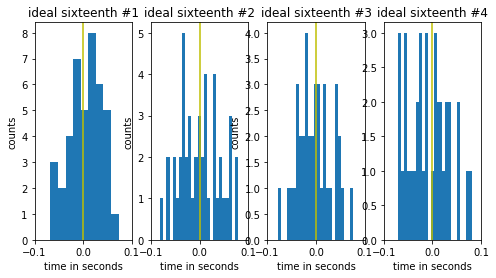

In [80]:
plot_histogramm1(c_one.keys(), c_two.keys(), c_three.keys(), c_four.keys())

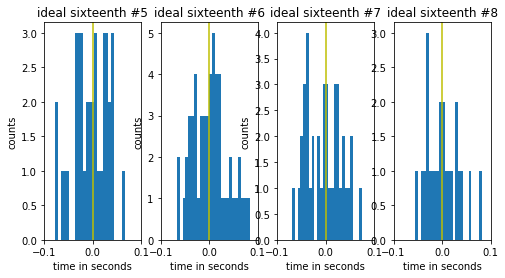

In [81]:
plot_histogramm2(c_five.keys(), c_six.keys(), c_seven.keys(), c_eight.keys())

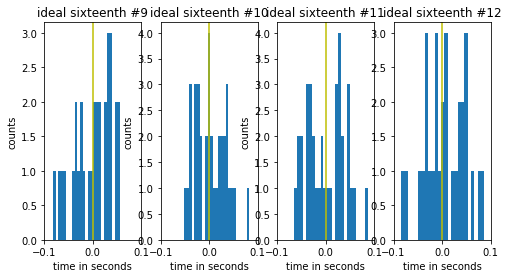

In [82]:
plot_histogramm3(c_nine.keys(), c_ten.keys(), c_eleven.keys(), c_twelve.keys())

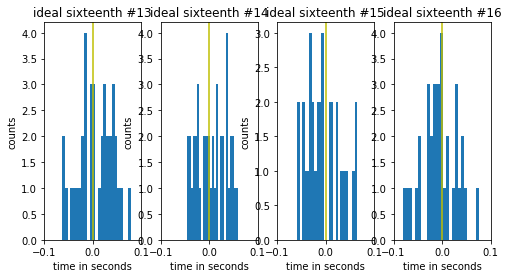

In [83]:
plot_histogramm4(c_thirteen.keys(), c_fourteen.keys(), c_fifteen.keys(), c_sixteen.keys())

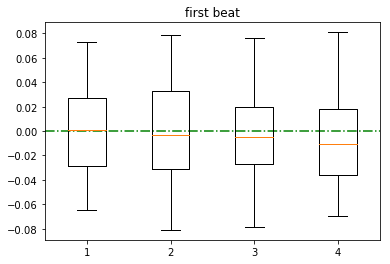

In [84]:
plot_boxplot1(c_one.keys(), c_two.keys(), c_three.keys(), c_four.keys())  

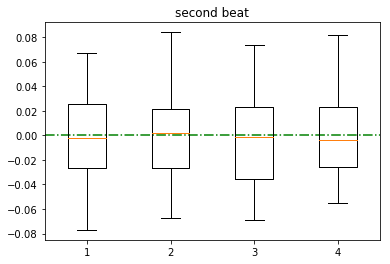

In [85]:
plot_boxplot2(c_five.keys(), c_six.keys(),c_seven.keys(), c_eight.keys())

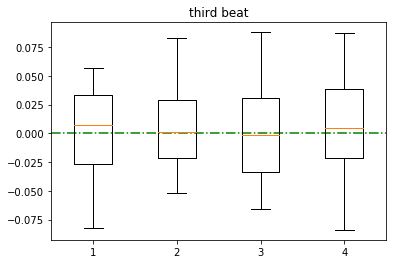

In [86]:
plot_boxplot3(c_nine.keys(), c_ten.keys(),c_eleven.keys(), c_twelve.keys())

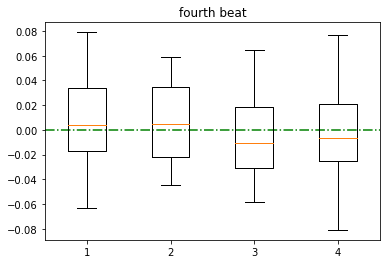

In [87]:
plot_boxplot4(c_thirteen.keys(), c_fourteen.keys(),c_fifteen.keys(), c_sixteen.keys()) 

# #2: SNARE (and co.)

In [88]:
# for f in *.csv; do grep -E 'sweep|sticks|sd|rs|cs' $f > test.$f; done 
# for f in *.csv; do cut -d' ' -f2 --complement $f > onset.$f; done

In [89]:
beat = []
devs = []
for file in os.listdir('sounds/'):

    beats=[]
    idealSixteenths = []
    init_beat = []
    end_beat = []
    
    if '.wav' not in file: continue
    filename = file
    load_file = 'sounds/' + filename  
    
    # load audio 
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    # find beats
    bt = es.BeatTrackerMultiFeature()
    beats, _ = bt(audio)

    # create metrical grid:
    a = len(beats) - 1
    init_beat = beats[0]
    end_beat = beats[a]

    # equally spaced lines
    ids_range = len(beats)*4
    idealSixteenths = np.linspace(init_beat, end_beat, ids_range)

    # read annotated onsets from csv-file
    read_onset = 'onsets/snare/' + 'onset.snare.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)

    # find nearest neighbour

    for onset in onsets:
        devs.append(nearestNeighbour(onset, idealSixteenths))

    # print devs
    
    # see amount of onsets per ideal sixteenths:
    # Counter(elem[0] for elem in devs)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:33: UserWarning: genfromtxt: Empty input file: "onsets/snare/onset.snare.048_phrase_afro_simple_slow_mallets.csv"


In [90]:
ids_one = [item for item in devs if item[0] == 1]
ids_two = [item for item in devs if item[0] == 2]
ids_three = [item for item in devs if item[0] == 3]
ids_four = [item for item in devs if item[0] == 4]
ids_five = [item for item in devs if item[0] == 5]
ids_six = [item for item in devs if item[0] == 6]
ids_seven = [item for item in devs if item[0] == 7]
ids_eight = [item for item in devs if item[0] == 8]
ids_nine = [item for item in devs if item[0] == 9]
ids_ten = [item for item in devs if item[0] == 10]
ids_eleven = [item for item in devs if item[0] == 11]
ids_twelve = [item for item in devs if item[0] == 12]
ids_thirteen = [item for item in devs if item[0] == 13]
ids_fourteen = [item for item in devs if item[0] == 14]
ids_fifteen = [item for item in devs if item[0] == 15]
ids_sixteen = [item for item in devs if item[0] == 16]

c_one = Counter(elem[1] for elem in ids_one)
c_two = Counter(elem[1] for elem in ids_two)
c_three = Counter(elem[1] for elem in ids_three)
c_four = Counter(elem[1] for elem in ids_four)
c_five = Counter(elem[1] for elem in ids_five)
c_six = Counter(elem[1] for elem in ids_six)
c_seven = Counter(elem[1] for elem in ids_seven)
c_eight = Counter(elem[1] for elem in ids_eight)
c_nine = Counter(elem[1] for elem in ids_nine)
c_ten = Counter(elem[1] for elem in ids_ten)
c_eleven = Counter(elem[1] for elem in ids_eleven)
c_twelve = Counter(elem[1] for elem in ids_twelve)
c_thirteen = Counter(elem[1] for elem in ids_thirteen)
c_fourteen = Counter(elem[1] for elem in ids_fourteen)
c_fifteen = Counter(elem[1] for elem in ids_fifteen)
c_sixteen = Counter(elem[1] for elem in ids_sixteen)

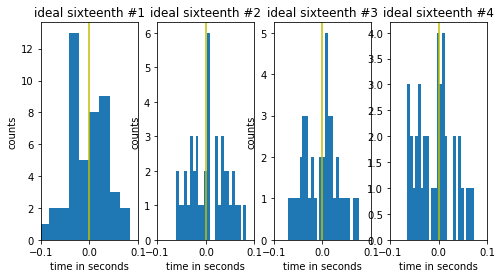

In [91]:
plot_histogramm1(c_one.keys(), c_two.keys(), c_three.keys(), c_four.keys())

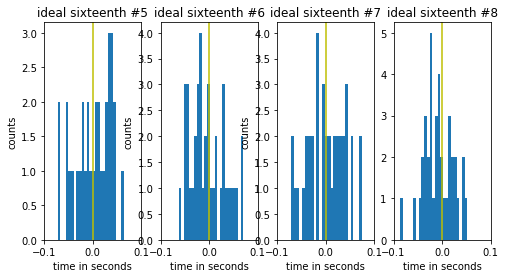

In [92]:
plot_histogramm2(c_five.keys(), c_six.keys(), c_seven.keys(), c_eight.keys())

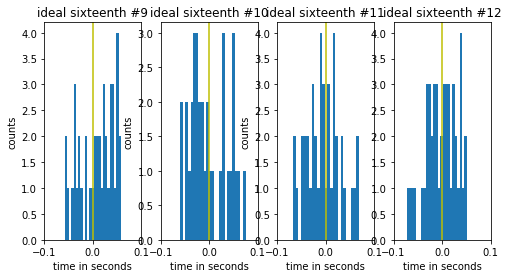

In [93]:
plot_histogramm3(c_nine.keys(), c_ten.keys(), c_eleven.keys(), c_twelve.keys())

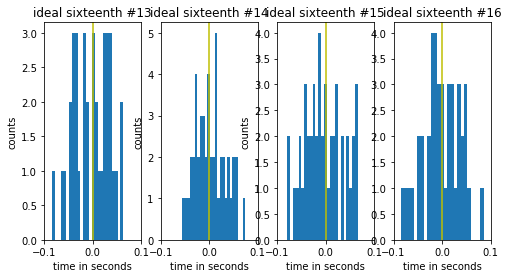

In [94]:
plot_histogramm4(c_thirteen.keys(), c_fourteen.keys(), c_fifteen.keys(), c_sixteen.keys())

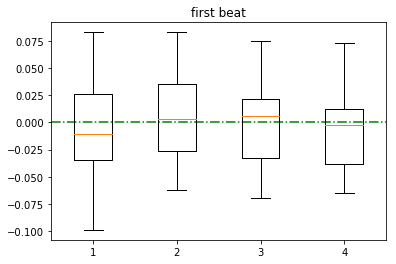

In [95]:
plot_boxplot1(c_one.keys(), c_two.keys(), c_three.keys(), c_four.keys())  

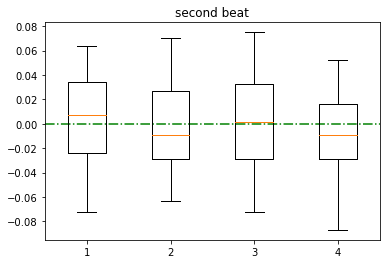

In [96]:
plot_boxplot2(c_five.keys(), c_six.keys(),c_seven.keys(), c_eight.keys())

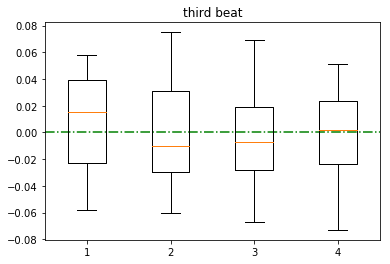

In [97]:
plot_boxplot3(c_nine.keys(), c_ten.keys(),c_eleven.keys(), c_twelve.keys())

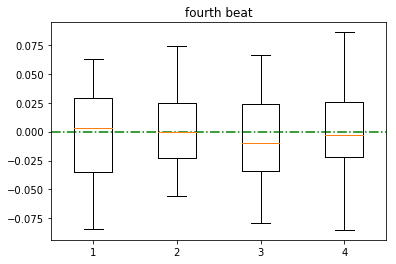

In [98]:
plot_boxplot4(c_thirteen.keys(), c_fourteen.keys(),c_fifteen.keys(), c_sixteen.keys())

# #3: HI-HATS AND CYMBALS
#3: hi-hat (closed) (chh), hi-hat (open) (ohh), cowbell (cb), other cymbals (c)

In [99]:
beat = []
devs = []
for file in os.listdir('sounds/'):

    beats=[]
    idealSixteenths = []
    init_beat = []
    end_beat = []
    
    if '.wav' not in file: continue
    filename = file
    load_file = 'sounds/' + filename  
    
    # load audio 
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    # find beats
    bt = es.BeatTrackerMultiFeature()
    beats, _ = bt(audio)

    # check if beats are %4
    if len(beats)%4 == 0:
        print 'The song is probably in 4/4'
    else:
        beat_outliers.append(file)
    # save graph to specific folder

    # create metrical grid:
    a = len(beats) - 1
    init_beat = beats[0]
    end_beat = beats[a]

    # equally spaced lines
    ids_range = len(beats)*4
    idealSixteenths = np.linspace(init_beat, end_beat, ids_range)

    #file = filename
    #filejpg = 'plots/'+'plot.' + file[:-3] + 'png'

    fs=44100
    t = np.arange(len(audio))/float(fs)
    plt.plot(t, audio)
    for loc in idealSixteenths:
        plt.axvline(x=loc, color='y')
    #for i in range(len(beats)):
    #    plt.axvline(idealSixteenths[4*i], color = 'r')

    title = file[:-4] 
    plt.title(title)
    plt.xlabel('time')
    plt.ylabel('audio')
    # plt.savefig(filejpg)
    plt.close()

    # save metrical grid to file
    # should be used for later analysis of the instruments

    #filetxt = 'metrical_grid/'+'metgrid.' + file[:-3] + 'txt' #or csv?
    #np.savetxt(filetxt, idealSixteenths)

    # read annotated onsets from csv-file
    read_onset = 'onsets/hihat/' + 'onset.hihat.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)

    # find nearest neighbour

    for onset in onsets:
        devs.append(nearestNeighbour(onset, idealSixteenths))

    # print devs
    
    # see amount of onsets per ideal sixteenths:
    # Counter(elem[0] for elem in devs)

The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/hihat/onset.hihat.048_phrase_afro_simple_slow_mallets.csv"


The song is probably in 4/4
The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/hihat/onset.hihat.085_phrase_waltz_simple_medium_brushes.csv"


The song is probably in 4/4
The song is probably in 4/4
The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/hihat/onset.hihat.084_phrase_waltz_simple_slow_brushes.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/hihat/onset.hihat.050_phrase_afro_simple_fast_mallets.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/hihat/onset.hihat.049_phrase_afro_simple_medium_mallets.csv"


The song is probably in 4/4


In [100]:
ids_one = [item for item in devs if item[0] == 1]
ids_two = [item for item in devs if item[0] == 2]
ids_three = [item for item in devs if item[0] == 3]
ids_four = [item for item in devs if item[0] == 4]
ids_five = [item for item in devs if item[0] == 5]
ids_six = [item for item in devs if item[0] == 6]
ids_seven = [item for item in devs if item[0] == 7]
ids_eight = [item for item in devs if item[0] == 8]
ids_nine = [item for item in devs if item[0] == 9]
ids_ten = [item for item in devs if item[0] == 10]
ids_eleven = [item for item in devs if item[0] == 11]
ids_twelve = [item for item in devs if item[0] == 12]
ids_thirteen = [item for item in devs if item[0] == 13]
ids_fourteen = [item for item in devs if item[0] == 14]
ids_fifteen = [item for item in devs if item[0] == 15]
ids_sixteen = [item for item in devs if item[0] == 16]

c_one = Counter(elem[1] for elem in ids_one)
c_two = Counter(elem[1] for elem in ids_two)
c_three = Counter(elem[1] for elem in ids_three)
c_four = Counter(elem[1] for elem in ids_four)
c_five = Counter(elem[1] for elem in ids_five)
c_six = Counter(elem[1] for elem in ids_six)
c_seven = Counter(elem[1] for elem in ids_seven)
c_eight = Counter(elem[1] for elem in ids_eight)
c_nine = Counter(elem[1] for elem in ids_nine)
c_ten = Counter(elem[1] for elem in ids_ten)
c_eleven = Counter(elem[1] for elem in ids_eleven)
c_twelve = Counter(elem[1] for elem in ids_twelve)
c_thirteen = Counter(elem[1] for elem in ids_thirteen)
c_fourteen = Counter(elem[1] for elem in ids_fourteen)
c_fifteen = Counter(elem[1] for elem in ids_fifteen)
c_sixteen = Counter(elem[1] for elem in ids_sixteen)

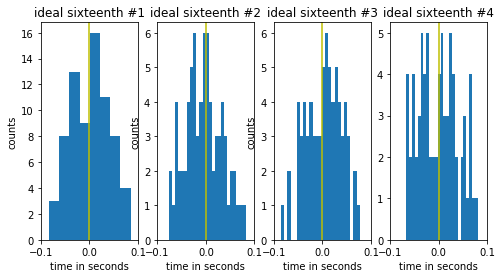

In [101]:
plot_histogramm1(c_one.keys(), c_two.keys(), c_three.keys(), c_four.keys())

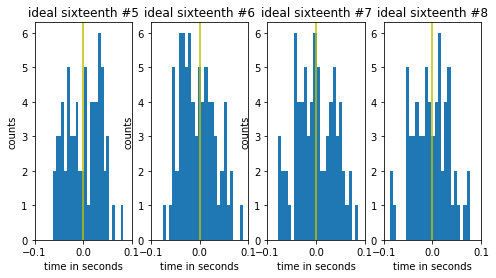

In [102]:
plot_histogramm2(c_five.keys(), c_six.keys(), c_seven.keys(), c_eight.keys())

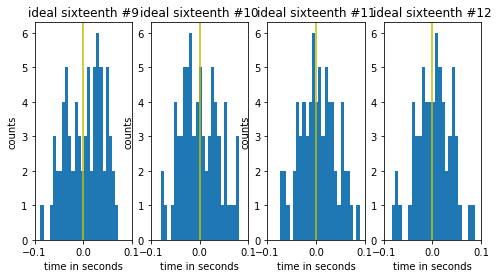

In [103]:
plot_histogramm3(c_nine.keys(), c_ten.keys(), c_eleven.keys(), c_twelve.keys())

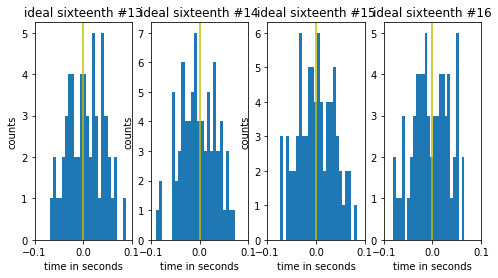

In [104]:
plot_histogramm4(c_thirteen.keys(), c_fourteen.keys(), c_fifteen.keys(), c_sixteen.keys())

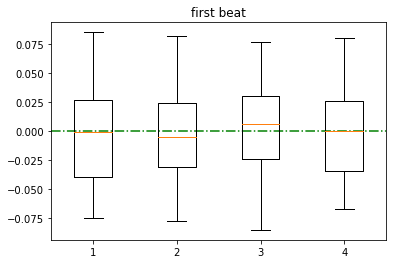

In [105]:
plot_boxplot1(c_one.keys(), c_two.keys(), c_three.keys(), c_four.keys())  

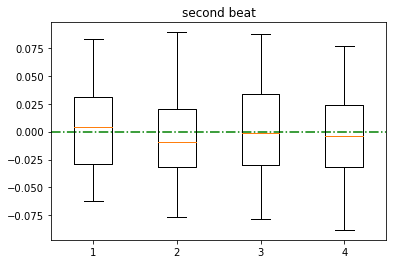

In [106]:
plot_boxplot2(c_five.keys(), c_six.keys(),c_seven.keys(), c_eight.keys())

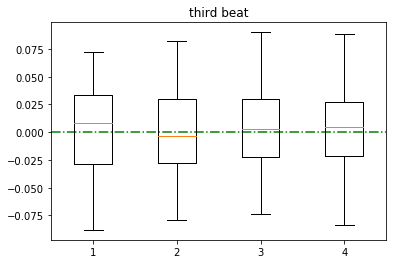

In [107]:
plot_boxplot3(c_nine.keys(), c_ten.keys(),c_eleven.keys(), c_twelve.keys())

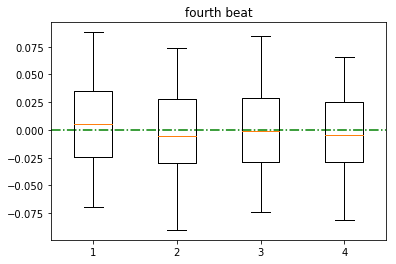

In [108]:
plot_boxplot4(c_thirteen.keys(), c_fourteen.keys(),c_fifteen.keys(), c_sixteen.keys())

# #4: Low-mid tom (lmt)

In [132]:
beat = []
devs = []
for file in os.listdir('sounds/'):

    beats=[]
    idealSixteenths = []
    init_beat = []
    end_beat = []
    
    if '.wav' not in file: continue
    filename = file
    load_file = 'sounds/' + filename  
    
    # load audio 
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    # find beats
    bt = es.BeatTrackerMultiFeature()
    beats, _ = bt(audio)

    # check if beats are %4
    if len(beats)%4 == 0:
        print 'The song is probably in 4/4'
    else:
        beat_outliers.append(file)
    # save graph to specific folder

    # create metrical grid:
    a = len(beats) - 1
    init_beat = beats[0]
    end_beat = beats[a]

    # equally spaced lines
    ids_range = len(beats)*4
    idealSixteenths = np.linspace(init_beat, end_beat, ids_range)

    #file = filename
    #filejpg = 'plots/'+'plot.' + file[:-3] + 'png'

    fs=44100
    t = np.arange(len(audio))/float(fs)
    plt.plot(t, audio)
    for loc in idealSixteenths:
        plt.axvline(x=loc, color='y')
    #for i in range(len(beats)):
    #    plt.axvline(idealSixteenths[4*i], color = 'r')

    title = file[:-4] 
    plt.title(title)
    plt.xlabel('time')
    plt.ylabel('audio')
    # plt.savefig(filejpg)
    plt.close()

    # save metrical grid to file
    # should be used for later analysis of the instruments

    #filetxt = 'metrical_grid/'+'metgrid.' + file[:-3] + 'txt' #or csv?
    #np.savetxt(filetxt, idealSixteenths)

    # read annotated onsets from csv-file
    read_onset = 'onsets/lmt/' + 'onset.lmt.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)

    # find nearest neighbour

    for onset in onsets:
        devs.append(nearestNeighbour(onset, idealSixteenths))

    # print devs
    
    # see amount of onsets per ideal sixteenths:
    # Counter(elem[0] for elem in devs)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.083_phrase_reggae-ska_complex_fast_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.070_phrase_shuffle-blues_complex_medium_brushes.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.063_phrase_salsa_complex_slow_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.071_phrase_shuffle-blues_complex_fast_brushes.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.052_phrase_afro_complex_medium_mallets.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.040_phrase_disco_complex_medium_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.037_phrase_disco_simple_medium_sticks.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.082_phrase_reggae_complex_medium_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.066_phrase_shuffle-blues_simple_slow_brushes.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.086_phrase_waltz_simple_fast_brushes.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.081_phrase_reggae_complex_slow_sticks.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.036_phrase_disco_simple_slow_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.089_phrase_waltz_complex_fast_brushes.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.065_phrase_salsa_complex_fast_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.053_phrase_afro_complex_fast_mallets.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.069_phrase_shuffle-blues_complex_slow_brushes.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.047_phrase_rock_complex_fast_rods.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.044_phrase_rock_simple_fast_rods.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.038_phrase_disco_simple_fast_sticks.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.061_phrase_salsa_simple_medium_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.079_phrase_reggae_simple_medium_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.068_phrase_shuffle-blues_simple_fast_brushes.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.051_phrase_afro_complex_slow_mallets.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.048_phrase_afro_simple_slow_mallets.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.041_phrase_disco_complex_fast_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.062_phrase_salsa_simple_fast_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.087_phrase_waltz_complex_slow_brushes.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.043_phrase_rock_simple_medium_rods.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.085_phrase_waltz_simple_medium_brushes.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.039_phrase_disco_complex_slow_sticks.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.042_phrase_rock_simple_slow_rods.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.078_phrase_reggae_simple_slow_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.064_phrase_salsa_complex_medium_sticks.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.084_phrase_waltz_simple_slow_brushes.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.060_phrase_salsa_simple_slow_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.067_phrase_shuffle-blues_simple_medium_brushes.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.050_phrase_afro_simple_fast_mallets.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.049_phrase_afro_simple_medium_mallets.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.088_phrase_waltz_complex_medium_brushes.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.080_phrase_reggae_simple_fast_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.045_phrase_rock_complex_slow_rods.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/lmt/onset.lmt.046_phrase_rock_complex_medium_rods.csv"


In [133]:
devs

[]

It appears that this drummer doesn't make use of the low mid-tom!

# #5: Toms

In [119]:
beat = []
devs = []
for file in os.listdir('sounds/'):

    beats=[]
    idealSixteenths = []
    init_beat = []
    end_beat = []
    
    if '.wav' not in file: continue
    filename = file
    load_file = 'sounds/' + filename  
    
    # load audio 
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    # find beats
    bt = es.BeatTrackerMultiFeature()
    beats, _ = bt(audio)

    # create metrical grid:
    a = len(beats) - 1
    init_beat = beats[0]
    end_beat = beats[a]

    # equally spaced lines
    ids_range = len(beats)*4
    idealSixteenths = np.linspace(init_beat, end_beat, ids_range)

    #file = filename
    #filejpg = 'plots/'+'plot.' + file[:-3] + 'png'

    fs=44100
    t = np.arange(len(audio))/float(fs)
    plt.plot(t, audio)
    for loc in idealSixteenths:
        plt.axvline(x=loc, color='y')
    #for i in range(len(beats)):
    #    plt.axvline(idealSixteenths[4*i], color = 'r')

    title = file[:-4] 
    plt.title(title)
    plt.xlabel('time')
    plt.ylabel('audio')
    # plt.savefig(filejpg)
    plt.close()

    # save metrical grid to file
    # should be used for later analysis of the instruments

    #filetxt = 'metrical_grid/'+'metgrid.' + file[:-3] + 'txt' #or csv?
    #np.savetxt(filetxt, idealSixteenths)

    # read annotated onsets from csv-file
    read_onset = 'onsets/toms/' + 'onset.toms.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)

    # find nearest neighbour

    for onset in onsets:
        devs.append(nearestNeighbour(onset, idealSixteenths))

    # print devs
    
    # see amount of onsets per ideal sixteenths:
    # Counter(elem[0] for elem in devs)

The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.037_phrase_disco_simple_medium_sticks.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.066_phrase_shuffle-blues_simple_slow_brushes.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.086_phrase_waltz_simple_fast_brushes.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.036_phrase_disco_simple_slow_sticks.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.044_phrase_rock_simple_fast_rods.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.038_phrase_disco_simple_fast_sticks.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.061_phrase_salsa_simple_medium_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.079_phrase_reggae_simple_medium_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.068_phrase_shuffle-blues_simple_fast_brushes.csv"


The song is probably in 4/4
The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.043_phrase_rock_simple_medium_rods.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.085_phrase_waltz_simple_medium_brushes.csv"


The song is probably in 4/4
The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.042_phrase_rock_simple_slow_rods.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.078_phrase_reggae_simple_slow_sticks.csv"


The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.084_phrase_waltz_simple_slow_brushes.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.060_phrase_salsa_simple_slow_sticks.csv"
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.067_phrase_shuffle-blues_simple_medium_brushes.csv"


The song is probably in 4/4
The song is probably in 4/4


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:64: UserWarning: genfromtxt: Empty input file: "onsets/toms/onset.toms.080_phrase_reggae_simple_fast_sticks.csv"


In [120]:
ids_one = [item for item in devs if item[0] == 1]
ids_two = [item for item in devs if item[0] == 2]
ids_three = [item for item in devs if item[0] == 3]
ids_four = [item for item in devs if item[0] == 4]
ids_five = [item for item in devs if item[0] == 5]
ids_six = [item for item in devs if item[0] == 6]
ids_seven = [item for item in devs if item[0] == 7]
ids_eight = [item for item in devs if item[0] == 8]
ids_nine = [item for item in devs if item[0] == 9]
ids_ten = [item for item in devs if item[0] == 10]
ids_eleven = [item for item in devs if item[0] == 11]
ids_twelve = [item for item in devs if item[0] == 12]
ids_thirteen = [item for item in devs if item[0] == 13]
ids_fourteen = [item for item in devs if item[0] == 14]
ids_fifteen = [item for item in devs if item[0] == 15]
ids_sixteen = [item for item in devs if item[0] == 16]

c_one = Counter(elem[1] for elem in ids_one)
c_two = Counter(elem[1] for elem in ids_two)
c_three = Counter(elem[1] for elem in ids_three)
c_four = Counter(elem[1] for elem in ids_four)
c_five = Counter(elem[1] for elem in ids_five)
c_six = Counter(elem[1] for elem in ids_six)
c_seven = Counter(elem[1] for elem in ids_seven)
c_eight = Counter(elem[1] for elem in ids_eight)
c_nine = Counter(elem[1] for elem in ids_nine)
c_ten = Counter(elem[1] for elem in ids_ten)
c_eleven = Counter(elem[1] for elem in ids_eleven)
c_twelve = Counter(elem[1] for elem in ids_twelve)
c_thirteen = Counter(elem[1] for elem in ids_thirteen)
c_fourteen = Counter(elem[1] for elem in ids_fourteen)
c_fifteen = Counter(elem[1] for elem in ids_fifteen)
c_sixteen = Counter(elem[1] for elem in ids_sixteen)

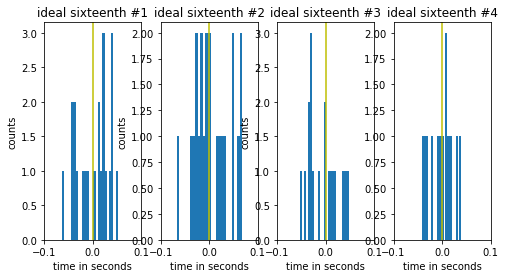

In [121]:
plot_histogramm1(c_one.keys(), c_two.keys(), c_three.keys(), c_four.keys())

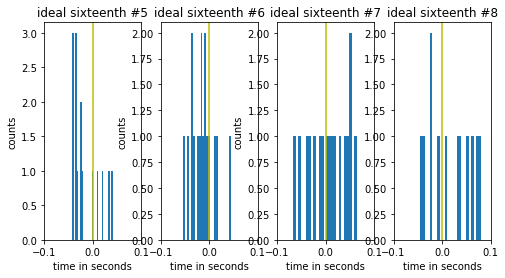

In [122]:
plot_histogramm2(c_five.keys(), c_six.keys(), c_seven.keys(), c_eight.keys())

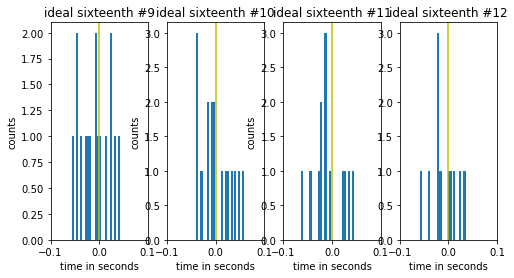

In [123]:
plot_histogramm3(c_nine.keys(), c_ten.keys(), c_eleven.keys(), c_twelve.keys())

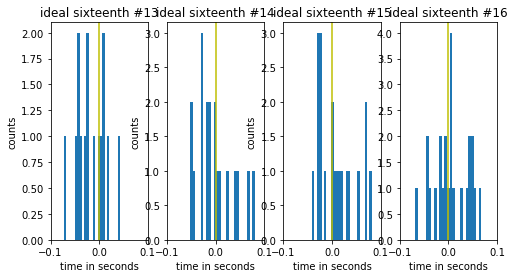

In [124]:
plot_histogramm4(c_thirteen.keys(), c_fourteen.keys(), c_fifteen.keys(), c_sixteen.keys())

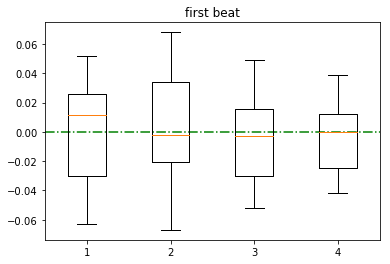

In [125]:
plot_boxplot1(c_one.keys(), c_two.keys(), c_three.keys(), c_four.keys())

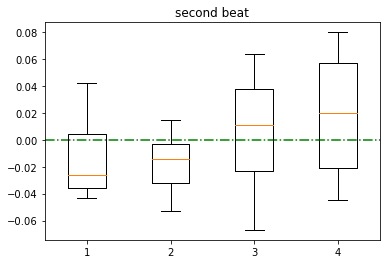

In [126]:
plot_boxplot2(c_five.keys(), c_six.keys(),c_seven.keys(), c_eight.keys())

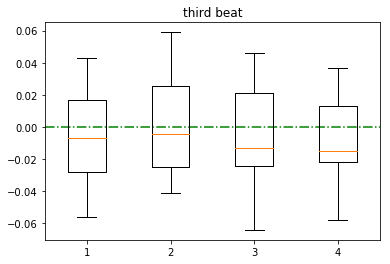

In [127]:
plot_boxplot3(c_nine.keys(), c_ten.keys(),c_eleven.keys(), c_twelve.keys())

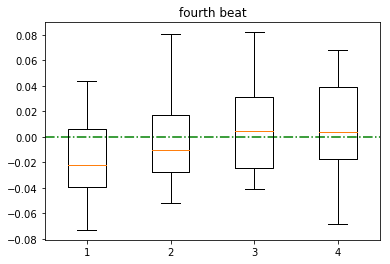

In [128]:
plot_boxplot4(c_thirteen.keys(), c_fourteen.keys(),c_fifteen.keys(), c_sixteen.keys())

# #6 Cymbals

In [129]:
#6: ride cymbal (rc), chinese ride cymbal (ch), crash cymbal (cr), splash cymbal (spl)

In [135]:
beat = []
devs = []
for file in os.listdir('sounds/'):

    beats=[]
    idealSixteenths = []
    init_beat = []
    end_beat = []
    
    if '.wav' not in file: continue
    filename = file
    load_file = 'sounds/' + filename  
    
    # load audio 
    loader = es.MonoLoader(filename=load_file)
    audio = loader()

    # find beats
    bt = es.BeatTrackerMultiFeature()
    beats, _ = bt(audio)

    # create metrical grid:
    a = len(beats) - 1
    init_beat = beats[0]
    end_beat = beats[a]

    # equally spaced lines
    ids_range = len(beats)*4
    idealSixteenths = np.linspace(init_beat, end_beat, ids_range)

    file = filename
    filejpg = 'plots/'+'plot.' + file[:-3] + 'png'

    fs=44100
    t = np.arange(len(audio))/float(fs)
    plt.plot(t, audio)
    for loc in idealSixteenths:
        plt.axvline(x=loc, color='y')
    #for i in range(len(beats)):
    #    plt.axvline(idealSixteenths[4*i], color = 'r')

    title = file[:-4] 
    plt.title(title)
    plt.xlabel('time')
    plt.ylabel('audio')
    plt.savefig(filejpg)
    plt.close()

    # save metrical grid to file
    # should be used for later analysis of the instruments

    filetxt = 'metrical_grid/'+'metgrid.' + file[:-3] + 'txt' #or csv?
    np.savetxt(filetxt, idealSixteenths)

    # read annotated onsets from csv-file
    read_onset = 'onsets/' + 'onset.' + filename[:-3] + 'csv'
    onsets = np.genfromtxt(read_onset)

    # find nearest neighbour

    for onset in onsets:
        devs.append(nearestNeighbour(onset, idealSixteenths))

    # print devs
    
    # see amount of onsets per ideal sixteenths:
    # Counter(elem[0] for elem in devs)

In [136]:
ids_one = [item for item in devs if item[0] == 1]
ids_two = [item for item in devs if item[0] == 2]
ids_three = [item for item in devs if item[0] == 3]
ids_four = [item for item in devs if item[0] == 4]
ids_five = [item for item in devs if item[0] == 5]
ids_six = [item for item in devs if item[0] == 6]
ids_seven = [item for item in devs if item[0] == 7]
ids_eight = [item for item in devs if item[0] == 8]
ids_nine = [item for item in devs if item[0] == 9]
ids_ten = [item for item in devs if item[0] == 10]
ids_eleven = [item for item in devs if item[0] == 11]
ids_twelve = [item for item in devs if item[0] == 12]
ids_thirteen = [item for item in devs if item[0] == 13]
ids_fourteen = [item for item in devs if item[0] == 14]
ids_fifteen = [item for item in devs if item[0] == 15]
ids_sixteen = [item for item in devs if item[0] == 16]

c_one = Counter(elem[1] for elem in ids_one)
c_two = Counter(elem[1] for elem in ids_two)
c_three = Counter(elem[1] for elem in ids_three)
c_four = Counter(elem[1] for elem in ids_four)
c_five = Counter(elem[1] for elem in ids_five)
c_six = Counter(elem[1] for elem in ids_six)
c_seven = Counter(elem[1] for elem in ids_seven)
c_eight = Counter(elem[1] for elem in ids_eight)
c_nine = Counter(elem[1] for elem in ids_nine)
c_ten = Counter(elem[1] for elem in ids_ten)
c_eleven = Counter(elem[1] for elem in ids_eleven)
c_twelve = Counter(elem[1] for elem in ids_twelve)
c_thirteen = Counter(elem[1] for elem in ids_thirteen)
c_fourteen = Counter(elem[1] for elem in ids_fourteen)
c_fifteen = Counter(elem[1] for elem in ids_fifteen)
c_sixteen = Counter(elem[1] for elem in ids_sixteen)

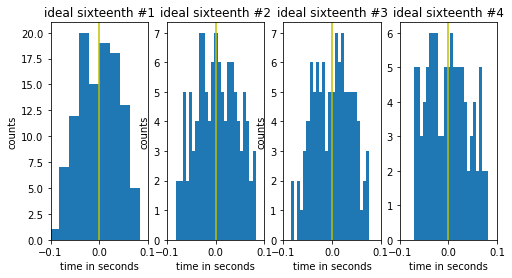

In [137]:
plot_histogramm1(c_one.keys(), c_two.keys(), c_three.keys(), c_four.keys())

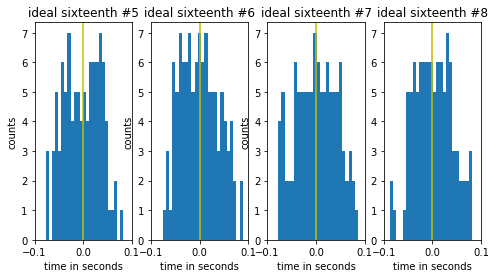

In [138]:
plot_histogramm2(c_five.keys(), c_six.keys(), c_seven.keys(), c_eight.keys())

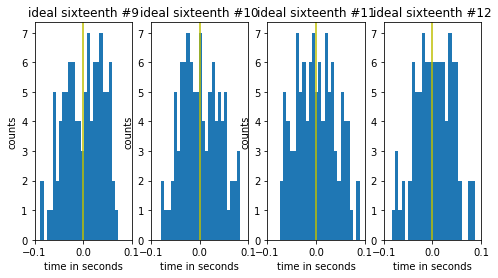

In [139]:
plot_histogramm3(c_nine.keys(), c_ten.keys(), c_eleven.keys(), c_twelve.keys())

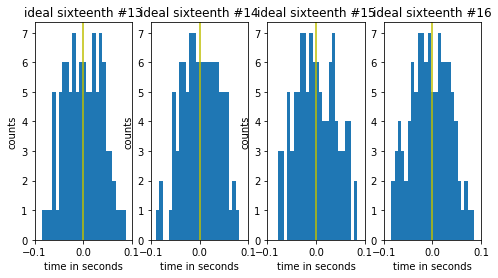

In [140]:
plot_histogramm4(c_thirteen.keys(), c_fourteen.keys(), c_fifteen.keys(), c_sixteen.keys())

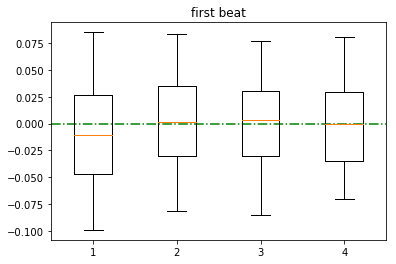

In [141]:
plot_boxplot1(c_one.keys(), c_two.keys(), c_three.keys(), c_four.keys())  

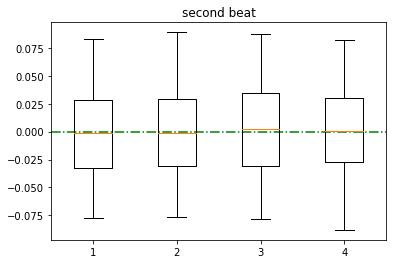

In [142]:

plot_boxplot2(c_five.keys(), c_six.keys(),c_seven.keys(), c_eight.keys())

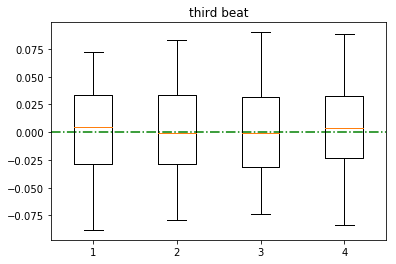

In [143]:

plot_boxplot3(c_nine.keys(), c_ten.keys(),c_eleven.keys(), c_twelve.keys())

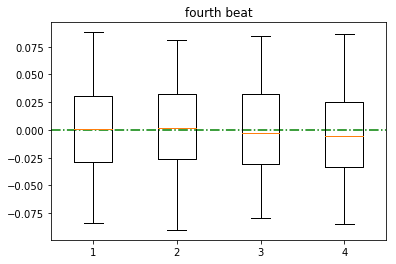

In [144]:

plot_boxplot4(c_thirteen.keys(), c_fourteen.keys(),c_fifteen.keys(), c_sixteen.keys())

In [ ]:
# c_item = sorted(c_one.items(), key = lambda x:float(x[0])) # properly ascending list